In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Data Generation

In [8]:
N = 1000
mu_1, sigma_1 = 75, 10
exam_1 = np.random.normal(mu_1, sigma_1, N//2)
exam_1 = exam_1.astype(int)
exam_1 = np.clip(exam_1, 0, 100)
mu_2, sigma_2 = 45, 10
exam_2 = np.random.normal(mu_2, sigma_2, N//2)
exam_2 = exam_2.astype(int)
exam_2 = np.clip(exam_2, 0, 100)
X = np.concatenate((exam_1, exam_2))
Y = np.zeros(N, dtype=np.bool_)
Y[:N//2] = 1

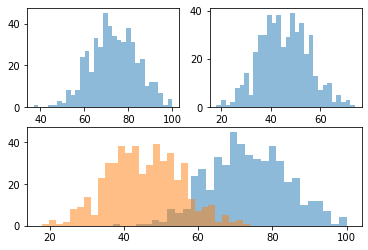

In [12]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
_ = ax.hist(exam_1, alpha = 0.5, bins=30)
_ = ax2.hist(exam_2, alpha=0.5, bins=30)
_ = ax3.hist(exam_1, alpha=0.5, bins=30)
_ = ax3.hist(exam_2, alpha = 0.5, bins=30)

# Problem 1

Let `X[i]` be the final exam score of student `i` and ranges from 0 to 100. Let `Y[i]` be 1 if they got into college and 0 if they didn't. `N` is the total number of students. As a student counselor, you want to know what should be a cutoff for the final exam scores to determine the likelihood of the student getting into college. Calculate the final exam score threshold that yields the highest precision and recall values.

![Confusion Matrix](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm "CM with precision and recall")

In [16]:
def create_confusion_matrix(ground_truth, model_data):
    #print(model_data)
    tp = (ground_truth & model_data).sum()
    tn = (~ground_truth & ~model_data).sum()
    fp = (~ground_truth & model_data).sum()
    fn = (ground_truth & ~model_data).sum()
    confusion_matrix = np.array([[tp, fp], [fn, tn]])
    return confusion_matrix

In [21]:
def calculate_precision(confusion_matrix):
    # tp / (tp + fp)
    return confusion_matrix[0][0]/(1e-20 + confusion_matrix[0][0] + confusion_matrix[0][1])

def calculate_recall(confusion_matrix):
    # tp / (tp + fn)
    return confusion_matrix[0][0]/(1e-20 + confusion_matrix[0][0] + confusion_matrix[1][0])

In [20]:
def generate_f1_score(precision, recall):
    # TODO
    return 2*(precision * recall)/(precision + recall)

In [14]:
def calculate_threshold(X, Y):
    nmin = np.min(X)
    nmax = np.max(X)
    f1_highest = 0
    threshold_highest = nmin
    for i in range(nmin, nmax + 1): 
        pred = X > i
        cm = create_confusion_matrix(Y, pred)
        prec = calculate_precision(cm)
        rec = calculate_recall(cm)
        f1 = generate_f1_score(prec, rec)
        if f1 > f1_highest:
            f1_highest = f1
            threshold_highest = i
            
    return f1_highest, threshold_highest

calculate_threshold(X, Y)

(0, 0)

# Problem 2
Assume there is a budget cut in your college counseling department. As a counselor, you can allocate some resources only on those students who are likley to go to college. However, you have to follow no-student-left-behind policy as closely as possible. That is, every student you misclassify as a false-negative, there's a higher penalty. Assuming you get 1 point for true positive and true negative, and -2 points for a false negative and -1 point for false positive, what is the threshold for the final exam score that can predict if a student will go to college or not?

In [26]:
def calculate_gains(ground_truth, model_data):
    tp = (ground_truth & model_data).sum()
    tn = (~ground_truth & ~model_data).sum()
    fp = (~ground_truth & model_data).sum()
    fn = (ground_truth & ~model_data).sum()
    
    return tp + (-1)*fp + (-2)*fn + tn

In [27]:
def maximize_gains(X, Y):
    nmin = np.min(X)
    nmax = np.max(X)
    
    gain_highest = 0
    threshold = nmin
    for i in range(nmin, nmax + 1): 
        pred = X > i
        gain = calculate_gains(Y, pred)
        if gain > gain_highest:
            gain_highest = gain
            threshold = i
            
    return gain_highest, threshold

# Problem 3

By raising the classification threshold, what happens to precision and recall?

Precision tends to increase, while recall decreases or stays the same. 

# Problem 4
There are two models: one with higher recall and the other with higher precision. Which model is better?
None - hard to tell

# Problem 5
If model A has better precision and better recall than model B, then is model A is a better model?
Yes.

# References

* https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall